<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_ejemplos/4_laplace/2_sol_pvi_1_2_order_laplace/3_pvi_orden_2_laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/edo/blob/main/banco_ejemplos/4_laplace/2_sol_pvi_1_2_order_laplace/3_pvi_orden_2_laplace.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Un PVI de orden 2 solucionado con transformada de Laplace

$$ y'' -4y' = 6e^{3t} -3e^{-t}, \ \ \ y(0) = 1, \ \ \ y'(0) = -1 $$

## [Video de apoyo]() 

## Solución con sympy:

In [1]:
import numpy as np 
from sympy import *

In [2]:
t = symbols('t', real = True, nonegative = True) 
s = symbols('s', real = True, positive = True) 

In [3]:
y,Y = symbols('y,Y')

In [4]:
y = Function('y')


Y = Function('Y') 

In [5]:
def L(f):
    return laplace_transform(f,t,s, noconds = True)  

In [6]:
def inv_L(F):
    return inverse_laplace_transform(F,s,t, noconds = True)  

In [7]:
def L_diff(f, f0, fp0, fpp0 = 0 , n = 1): # esta función es para calcular transformadas de derivadas
    """
    input:
    f es una variable sinbólica de sympy que representa a la función f(t) a la que se quiere calcular 
      la transformada de alguna de sus derivadas. 
    
    n puede asumir los valores de 0,1,2,3 y representa el orden de la derivada
    """
    F = str(f).upper()
    F = symbols(F) 
    F = Function(F)(s) 
    if n == 0:
        L = F
    elif n == 1:
        L = s*F - f0
    elif n == 2:
        L = s**2*F - s*f0 - fp0
    elif n == 3:
        L = s**3*F - s**2*f0,-s*fp0 - fpp0
    return L 

Construyamos la ecuación diferencial para el contexto de sympy

In [8]:
eq = Eq( diff(y(t),t,2) - 4*diff(y(t),t), 6*exp(3*t) - 3*exp(-t) )
eq 

Eq(-4*Derivative(y(t), t) + Derivative(y(t), (t, 2)), 6*exp(3*t) - 3*exp(-t))

Empecemos calculando la transformada de la ecuación diferencial dada:

In [9]:
y0  = 1
yp0 = -1 

Apliquemos transformada de Laplace a la ecuación diferencial que conforma el PVI dado:

In [10]:
eq_tran = Eq( L_diff(y, f0 = y0, fp0 = yp0, n = 2) - 4*L_diff(y, f0 = y0, fp0 = yp0, n = 1) , 6*L(exp(3*t)) - 3*L(exp(-t)) ) 

In [11]:
eq_tran  

Eq(s**2*Y(s) - 4*s*Y(s) - s + 5, -3/(s + 1) + 6/(s - 3))

$$ s^{2}Y - 4sY = s - 5 -\frac{3}{s+1} + \frac{6}{s-3} $$

$$ (s^{2} - 4s)Y = s - 5 -\frac{3}{s+1} + \frac{6}{s-3} $$

$$ s(s - 4)Y = \frac{(s-5)(s+1)(s-3)}{(s+1)(s-3)} - \frac{3(s-3)}{(s+1)(s-3)} + \frac{6(s+1)}{(s+1)(s-3)} $$

$$ s(s-4)Y = \frac{(s-5)(s+1)(s-3) - 3(s-3) + 6(s+1)}{(s+1)(s-3)} $$

$$ Y =  \frac{(s-5)(s+1)(s-3) - 3(s-3) + 6(s+1)}{s(s-4)(s+1)(s-3)}$$

$$ Y = \frac{(s^{2}- 4s -5)(s-3) -3s+9 + 6s + 6}{s(s+1)(s-3)(s-4)} $$

$$ Y = \frac{ s^{3} -4s^{2} -5s -3s^{2} + 12s + 15 + 3s + 15  }{s(s+1)(s-3)(s-4)} $$

$$ Y = \frac{s^{3} - 7s^{2} + 10s + 30}{s(s+1)(s-3)(s-4)} $$

$$ Y = \frac{A}{s} + \frac{B}{s+1} + \frac{C}{s-3} + \frac{D}{s-4} $$

In [12]:
sol = solve(eq_tran, Y(s))[0]

In [13]:
sol 

(s**3 - 7*s**2 + 10*s + 30)/(s*(s**3 - 6*s**2 + 5*s + 12))

In [14]:
def factor_2(s):
    return s**3 - 6*s**2 + 5*s + 12 

In [15]:
import numpy as np 
posibles_raices_racionales = np.array([1,2,3,4,6,12, -1,-2,-3,-4,-6,-12])

In [16]:
factor_2(posibles_raices_racionales) 

array([   12,     6,     0,     0,    42,   936,     0,   -30,   -84,
        -168,  -450, -2640])

In [17]:
Y = (s**3 - 7*s**2 + 10*s + 30)/(s*(s-3)*(s-4)*(s+1))
Y 

(s**3 - 7*s**2 + 10*s + 30)/(s*(s - 4)*(s - 3)*(s + 1))

$$ Y(s) = \frac{A}{s} + \frac{B}{s-4} + \frac{C}{s-3} + \frac{D}{s+1} $$

In [18]:
Y = Y.apart() 
Y 

-3/(5*(s + 1)) - 2/(s - 3) + 11/(10*(s - 4)) + 5/(2*s)

In [19]:
y = inv_L(Y)
y 

(11*exp(5*t) - 20*exp(4*t) + 25*exp(t) - 6)*exp(-t)*Heaviside(t)/10

In [20]:
y_ = (11*exp(5*t) - 20*exp(4*t) + 25*exp(t) - 6)*exp(-t)/10 
y_ = y_.expand() 
y_ 

11*exp(4*t)/10 - 2*exp(3*t) + 5/2 - 3*exp(-t)/5

In [21]:
-4*diff(y_,t) + diff(y_,t,2)

6*exp(3*t) - 3*exp(-t)

### Conclusión:   

La solución obtenida satisface la Ecuación diferencial que hace parte del PVI dada. 

In [22]:
y_.subs({t:0}) 

1

In [23]:
diff(y_,t).subs({t:0}) 

-1

### Concusión 2:

La función obtenida también satisface las condiciones inicales, por lo tanto, la solución obtenida si es solución del PVI. 

## Gráfica de la función solución $y(t)$

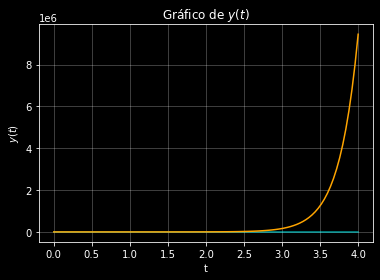

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('dark_background') 

t = np.linspace(0,4,100)

fig = plt.figure()
ax = fig.add_subplot()

y = (11*np.exp(5*t) - 20*np.exp(4*t) + 25*np.exp(t) - 6)*np.exp(-t)/10 

ax.plot([0,4],[0,0], color = 'cyan', alpha = 0.6)   # eje horizontal

ax.plot(t, y, color = 'orange')         # gráfico de función solución del PVI 



ax.set(title = r'Gráfico de $y(t)$', xlabel = 't', ylabel = r'$y(t)$')


ax.grid(True, alpha = 0.3)  

plt.savefig('3_pvi_2.jpg') 

plt.show() 

## Solución analítica de este PVI

## Teorema que sustentó la descomposición en fracciones parciales en este cuaderno

* Teorema de los posibles ceros racionales de una polinomio de coefientes enteros. 
* Teorema del residuo 
* Teorema del factor 

## Funciones de sympy y numpy que permitieron resolver el ejercicio

* `Eq()` para construir las ecuaciones de sympy
* `expand()` método de sympy para expresar un producto como una suma

## Referentes  

* Zill
